In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from google.colab import files

uploaded = files.upload()

Saving База.csv to База (1).csv


1. Загрузите данные из файла "База.csv"

In [11]:
df = pd.read_csv('База.csv',
                      usecols=['УИД_Брони', 'ДатаБрони', 'ВремяБрони', 'ИсточникБрони', 'ВременнаяБронь', 'СледующийСтатус', 'Город',
                               'ВидПомещения', 'Тип', 'ПродаваемаяПлощадь', 'Этаж', 'СтоимостьНаДатуБрони', 'ТипСтоимости', 'ВариантОплаты',
                               'ВариантОплатыДоп', 'СкидкаНаКвартиру', 'ФактическаяСтоимостьПомещения', 'СделкаАН', 'ИнвестиционныйПродукт',
                               'Привилегия', 'Статус лида (из CRM)'],
                      delimiter=';',
                      encoding='windows-1251')
df

,УИД_Брони,ДатаБрони,ВремяБрони,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Город,ВидПомещения,Тип,ПродаваемаяПлощадь,...,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,ВариантОплатыДоп,СкидкаНаКвартиру,ФактическаяСтоимостьПомещения,СделкаАН,ИнвестиционныйПродукт,Привилегия,Статус лида (из CRM)
0,d192173f-fc14-11eb-9512-000c29ad50ac,13.08.2021,1:00:01,ручная,Да,Свободна,Ярославль,жилые помещения,"2,5к",72,...,4296100,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4296100,Нет,Нет,Нет,S
1,43574a1f-fe8b-11eb-9512-000c29ad50ac,16.08.2021,4:12:46,ручная,Да,Свободна,Ярославль,жилые помещения,"3,5к","79,8",...,5279600,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5279600,Да,Нет,Нет,F
2,0e7b7a81-fe97-11eb-9512-000c29ad50ac,16.08.2021,5:37:12,ручная,Да,Свободна,Ярославль,жилые помещения,"2,5к","65,4",...,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,S
3,c7041428-f90b-11eb-9512-000c29ad50ac,09.08.2021,4:17:35,ручная,Да,Свободна,Тюмень,жилые помещения,"2,5к","61,6",...,5414500,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5414500,Нет,Нет,Нет,S
4,60090518-fe8b-11eb-9512-000c29ad50ac,16.08.2021,4:13:35,ручная,Да,Свободна,Ярославль,жилые помещения,"2,5к","65,4",...,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5514,945845a1-6269-11ec-951b-000c29ad50ac,21.12.2021,6:23:36,ручная,Нет,Свободна,Набережные Челны,жилые помещения,с,30,...,2373200,Стоимость при 100% оплате,Единовременная оплата,Ипотека,-94928,2468128,Нет,Нет,Нет,NaN
5515,4f131bfb-78f4-11ec-951d-000c29ad50ac,19.01.2022,10:52:06,ручная,Нет,NaN,Тюмень,кладовые,клад,"3,3",...,124700,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,124700,Нет,Нет,Нет,NaN
5516,74f0e184-78fc-11ec-951d-000c29ad50ac,19.01.2022,11:50:23,МП,Да,Свободна,Набережные Челны,жилые помещения,"1,5к","46,3",...,4499000,Стоимость при 100% оплате,Единовременная оплата,Ипотека,NaN,4499000,Нет,Нет,Нет,NaN
5517,12866ac0-7902-11ec-951d-000c29ad50ac,19.01.2022,12:30:40,МП,Нет,NaN,Пермь,жилые помещения,"2,5к","71,82",...,7422100,Стоимость при 100% оплате,Единовременная оплата,Ипотека,NaN,7422100,Да,Нет,Нет,NaN


2. Предварительная фильтрация.


a. Поскольку нас интересуют только сделки с жилой недвижимостью,
отфильтруйте данные, оставив только те, для которых «ВидПомещения» =
«жилые помещения». В дальнейшем этот столбец использоваться не будет,
его можно удалить (или удалите его из датасета вообще, или просто нигде
далее не рассматривайте).


In [12]:
df = df[df['ВидПомещения']=='жилые помещения']
del df['ВидПомещения']

b. Также для нас бесполезны данные, по которым статус не определен.
Отфильтруйте данные по признаку «СледующийСтатус». В оставшихся
строчках замените значение «Продана» на 1, «Свободна» – на 0.

In [13]:
df = df[df['СледующийСтатус'].notna() & (df['СледующийСтатус'] != 'В резерве')]
df['СледующийСтатус'] = df['СледующийСтатус'].map({'Продана': 1, 'Свободна': 0})

c. Не забывайте, что столбец «УИД_Брони» для нас также не представляет
интереса – удалите его из датасета вообще, или просто нигде далее не
рассматривайте.

In [14]:
del df['УИД_Брони']

Дополнительно уберем дату и время брони, так как в заданиях не сказано об их преобразовании, а в дальнейшем нужно будет нормализовать данные, для чего нужны численные типы, значит, они составят нам дополнительные трудности от которых проще избавиться

In [15]:
del df['ДатаБрони']
del df['ВремяБрони']

3. Проверьте тип данных и преобразуйте все данные к числовому типу

a. Для тех полей, которые по смыслу являются числовыми (например,
«ПродаваемаяПлощадь») – просто проверьте правильность типа

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3944 non-null   object 
 1   ВременнаяБронь                 3944 non-null   object 
 2   СледующийСтатус                3944 non-null   int64  
 3   Город                          3944 non-null   object 
 4   Тип                            3900 non-null   object 
 5   ПродаваемаяПлощадь             3900 non-null   object 
 6   Этаж                           3944 non-null   float64
 7   СтоимостьНаДатуБрони           3944 non-null   object 
 8   ТипСтоимости                   3944 non-null   object 
 9   ВариантОплаты                  3941 non-null   object 
 10  ВариантОплатыДоп               2218 non-null   object 
 11  СкидкаНаКвартиру               698 non-null    object 
 12  ФактическаяСтоимостьПомещения  3944 non-null   object

In [17]:
df['ПродаваемаяПлощадь'] = df['ПродаваемаяПлощадь'].str.replace(',', '.').astype(float)
df['Этаж'] = df['Этаж'].astype(int)
df['СтоимостьНаДатуБрони'] = df['СтоимостьНаДатуБрони'].str.replace(',', '.').astype(float)
df['СкидкаНаКвартиру'] = df['СкидкаНаКвартиру'].str.replace(',', '.').astype(float)
df['ФактическаяСтоимостьПомещения'] = df['ФактическаяСтоимостьПомещения'].str.replace(',', '.').astype(float)

b. Для бинарных признаков (например, «ИсточникБрони») выполните
кодирование (один вариант закодируйте 0, другой 1)

In [18]:
df['ИсточникБрони'] = df['ИсточникБрони'].map({'ручная': 1, 'МП': 0})
df['ВременнаяБронь'] = df['ВременнаяБронь'].map({'Да': 1, 'Нет': 0})
df['ТипСтоимости'] = df['ТипСтоимости'].map({'Стоимость при 100% оплате': 1, 'Стоимость в рассрочку': 0})
df['ВариантОплаты'] = df['ВариантОплаты'].map({'Единовременная оплата': 1, 'Оплата в рассрочку': 0})
df['ВариантОплатыДоп'] = df['ВариантОплатыДоп'].map({'Ипотека': 1, 'Вторичное жилье': 0})
df['СделкаАН'] = df['СделкаАН'].map({'Да': 1, 'Нет': 0})
df['ИнвестиционныйПродукт'] = df['ИнвестиционныйПродукт'].map({'Да': 1, 'Нет': 0})
df['Привилегия'] = df['Привилегия'].map({'Да': 1, 'Нет': 0})

c. Для категориальных не бинарных признаков (например, «Город»)
выполните one-hot кодирование.

In [19]:
df = pd.get_dummies(df,
                           columns=['Город', 'Статус лида (из CRM)'],
                           prefix=['Город', 'Статус_лида'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3944 non-null   int64  
 1   ВременнаяБронь                 3944 non-null   int64  
 2   СледующийСтатус                3944 non-null   int64  
 3   Тип                            3900 non-null   object 
 4   ПродаваемаяПлощадь             3900 non-null   float64
 5   Этаж                           3944 non-null   int64  
 6   СтоимостьНаДатуБрони           3944 non-null   float64
 7   ТипСтоимости                   3944 non-null   int64  
 8   ВариантОплаты                  3941 non-null   float64
 9   ВариантОплатыДоп               2218 non-null   float64
 10  СкидкаНаКвартиру               698 non-null    float64
 11  ФактическаяСтоимостьПомещения  3944 non-null   float64
 12  СделкаАН                       3944 non-null   int64 

d. Обратите внимание на поле «Тип». По смыслу оно числовое (количество
комнат), но напрямую сконвертировать его в числовой тип мешает буковка
«к» в конце. Напишите вручную преобразование, которое удаляет букву «к»
в конце и конвертирует то, что осталось, в число. Если это невозможно
(среди данных вам встретится еще вариант, когда в этом поле записано
просто «с») – просто пока оставьте поле пустым (NaN).


In [22]:
df['Тип'] = (
    df['Тип']
    .astype(str)
    .str.strip()
    .str.replace('к$', '', regex=True)
    .replace({'с': np.nan, 'С': np.nan})
    .str.replace(',', '.', regex=False)
    .astype(float)
)

4. Проверьте, есть ли по каким-либо признакам отсутствующие данные

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3944 non-null   int64  
 1   ВременнаяБронь                 3944 non-null   int64  
 2   СледующийСтатус                3944 non-null   int64  
 3   Тип                            3741 non-null   float64
 4   ПродаваемаяПлощадь             3900 non-null   float64
 5   Этаж                           3944 non-null   int64  
 6   СтоимостьНаДатуБрони           3944 non-null   float64
 7   ТипСтоимости                   3944 non-null   int64  
 8   ВариантОплаты                  3941 non-null   float64
 9   ВариантОплатыДоп               2218 non-null   float64
 10  СкидкаНаКвартиру               698 non-null    float64
 11  ФактическаяСтоимостьПомещения  3944 non-null   float64
 12  СделкаАН                       3944 non-null   int64 

a. Отсутствующие данные в поле «СкидкаНаКвартиру» замените на 0 (это
значение по умолчанию – если поле не заполнено, то скидки, по всей
видимости, нет).

In [24]:
df['СкидкаНаКвартиру'] = df['СкидкаНаКвартиру'].fillna(0)

b. Отсутствующие данные в полях «Тип» и «ПродаваемаяПлощадь» замените
на медианное значение, вычисленное по всему набору данных

In [25]:
median_val_type = df['Тип'].median()
median_val_square = df['ПродаваемаяПлощадь'].median()
df['Тип'] = df['Тип'].fillna(median_val_type)
df['ПродаваемаяПлощадь'] = df['ПродаваемаяПлощадь'].fillna(median_val_square)

c. Что делать с полем «ВариантОплатыДоп» решите самостоятельно (можно,
как указано в описании, вместо пустых значений использовать значение из
поля «ВариантОплаты», но в таком случае обратите внимание, что признак
становится не бинарным; допустимо также совсем убрать этот столбец из
рассмотрения).

In [26]:
del df['ВариантОплатыДоп']

d. По всем остальным полям примите решение самостоятельно. Если
отсутствующих данных не много, то удалите соответствующие строки.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3944 non-null   int64  
 1   ВременнаяБронь                 3944 non-null   int64  
 2   СледующийСтатус                3944 non-null   int64  
 3   Тип                            3944 non-null   float64
 4   ПродаваемаяПлощадь             3944 non-null   float64
 5   Этаж                           3944 non-null   int64  
 6   СтоимостьНаДатуБрони           3944 non-null   float64
 7   ТипСтоимости                   3944 non-null   int64  
 8   ВариантОплаты                  3941 non-null   float64
 9   СкидкаНаКвартиру               3944 non-null   float64
 10  ФактическаяСтоимостьПомещения  3944 non-null   float64
 11  СделкаАН                       3944 non-null   int64  
 12  ИнвестиционныйПродукт          3944 non-null   int64 

In [28]:
df = df[df['ВариантОплаты'].notna()]

5. Дополнение данных.

a. Добавьте новый признак «Цена за квадратный метр». Он должен
вычисляться на основе значений признаков
«ФактическаяСтоимостьПомещения» и «ПродаваемаяПлощадь».

In [29]:
df['Цена за квадратный метр'] = df['ФактическаяСтоимостьПомещения']/df['ПродаваемаяПлощадь']

b. Добавьте новый признак «Скидка в процентах», на основе значений
«ФактическаяСтоимостьПомещения» и «СкидкаНаКвартиру».

In [30]:
df['Скидка в процентах'] = round((df['СкидкаНаКвартиру']/df['ФактическаяСтоимостьПомещения'])*100, 2)

6. Выполните нормализацию. Можете самостоятельно выбрать способ
нормализации. «По умолчанию» предлагается выполнить минимаксную
нормализацию и привести все значения к диапазону [0;1], кроме признака
«СкидкаНаКвартиру» - его логичнее приводить к диапазону [-0,5; 0,5].

In [31]:
normalize_cols = [
    'Тип',
    'ПродаваемаяПлощадь',
    'Этаж',
    'СтоимостьНаДатуБрони',
    'ФактическаяСтоимостьПомещения',
    'Цена за квадратный метр'
]

scaler = MinMaxScaler()
df[normalize_cols] = scaler.fit_transform(df[normalize_cols])

scaler_neg = MinMaxScaler(feature_range=(-0.5, 0.5))
df[['СкидкаНаКвартиру', 'Скидка в процентах']] = scaler_neg.fit_transform(df[['СкидкаНаКвартиру', 'Скидка в процентах']])

7. Проверьте датасет на сбалансированность (количество строк со значением
целевого признака 0 и со значением 1). Является ли датасет сбалансированным?

In [33]:
status_counts = df['СледующийСтатус'].value_counts()
print(status_counts)

СледующийСтатус
0    2804
1    1137
Name: count, dtype: int64


Датасет является не очень сбалансированным, соотношение примерно 30/70, будем следить, чтобы из-за этого не возникло проблем

8. Сформируйте список факторных признаков и целевой признак.

In [34]:
y = df['СледующийСтатус']
feature_columns = [col for col in df.columns if col != 'СледующийСтатус']
X = df[feature_columns]

9. Выполните разбиение датасета на обучающую и тестовую выборки. При
формировании обучающей и тестовой выборок строки из исходного датафрейма
должны выбираться в случайном порядке.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=15)

10. Из библиотеки sklearn.neighbors возьмите алгоритм классификации KNN
(KNeighborsClassifier). Постройте (обучите) модель. Для параметров используйте
значения по умолчанию.

In [36]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

11. Из библиотеки sklearn.tree возьмите алгоритм классификации на основе деревьев
решений (DecisionTreeClassifier). Постройте (обучите) модель. Для параметров
используйте значения по умолчанию.


In [37]:
Tree_model = DecisionTreeClassifier()
Tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

12. Получите векторы прогнозных значений целевой переменной на обучающей и на
тестовой выборках для каждой из моделей.


In [44]:
y_pred_knn = KNN_model.predict(X_test)
y_pred_Tree = Tree_model.predict(X_test)

13. Посчитайте показатели качества: «F-мера», точность (Precision) и полнота (Recall)
на обучающей и на тестовой выборках для каждой из моделей.

In [45]:
print(
    f"""Метрики качества:
F1-score:
  KNN           : {f1_score(y_test, y_pred_knn):.2f}
  Decision Tree: {f1_score(y_test, y_pred_Tree):.2f}

Precision:
  KNN           : {precision_score(y_test, y_pred_knn):.2f}
  Decision Tree: {precision_score(y_test, y_pred_Tree):.2f}

Recall:
  KNN           : {recall_score(y_test, y_pred_knn):.2f}
  Decision Tree: {recall_score(y_test, y_pred_Tree):.2f}
"""
)


Метрики качества:
F1-score:
  KNN           : 0.69
  Decision Tree: 0.74

Precision:
  KNN           : 0.77
  Decision Tree: 0.78

Recall:
  KNN           : 0.62
  Decision Tree: 0.71



14. Сделайте вывод о том, насколько хорошо удалось решить задачу
прогнозирования. Какая модель оказалась лучше? Дайте интерпретацию
полученных значений Precision и Recall.


Задачу прогнозирования удалось решить достаточно хорошо: у Decision Tree и KNN получились похожие метрики, но везде выигрывает именно Decision Tree, так что эта модель лучше подойдет для прогноза

15. (1 балл) Постройте boxplot («ящик с усами») для всех числовых признаков.
Отфильтруйте исходные данные, удалив выбросы. Пересоздайте тестовую и
обучающую выборки, переобучите модели. Посчитайте показатели качества. Как
они изменились?


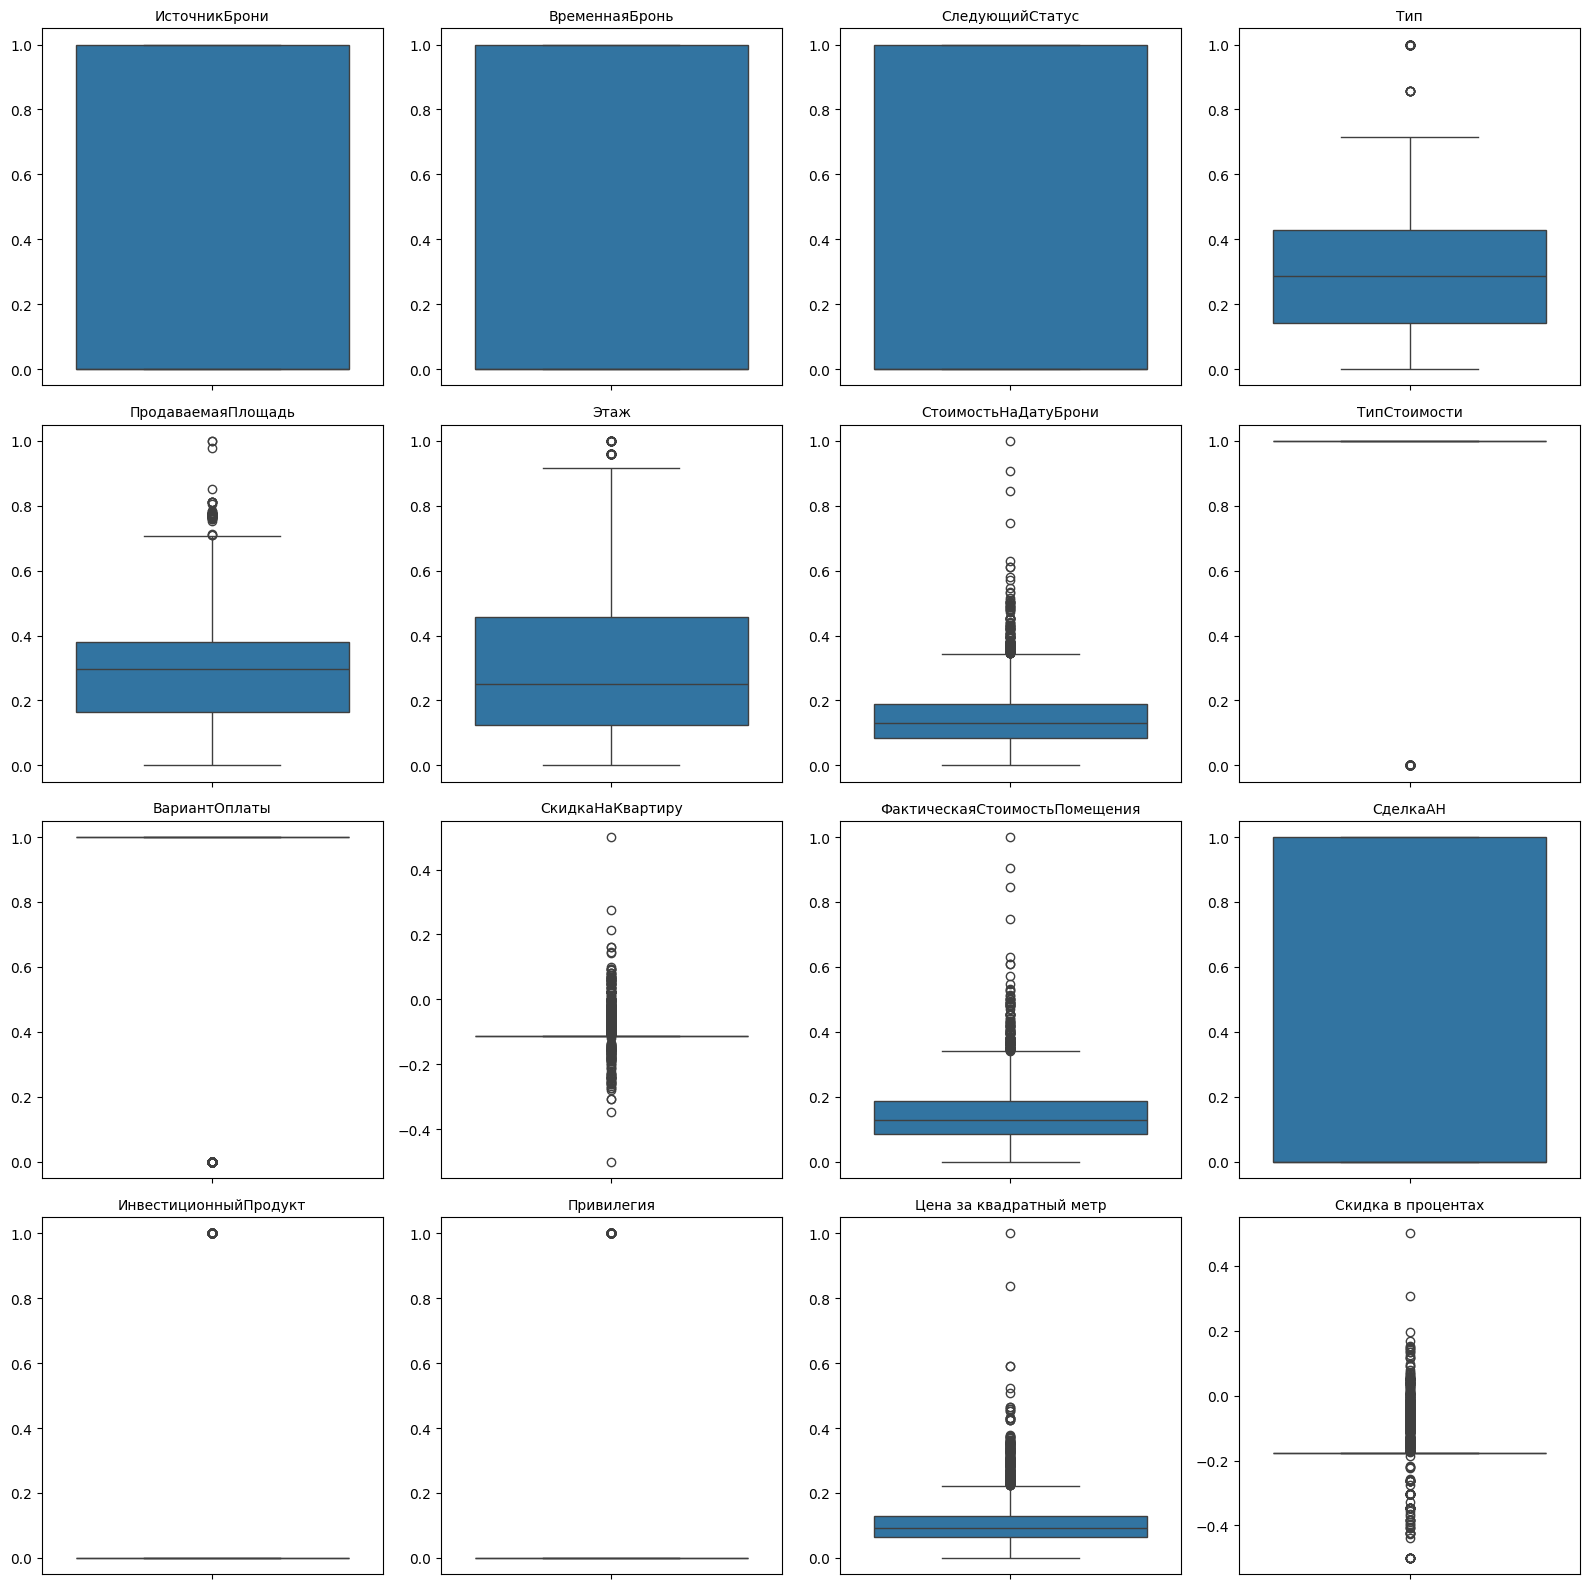

In [41]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 4
n_rows = -(-len(numeric_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.ravel()
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(col, fontsize=10)
    ax.set_ylabel('')

for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


In [42]:
df_filtered = df.copy()
for col in numeric_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

In [46]:
X_filtered = df_filtered[feature_columns]
y_filtered = df_filtered['СледующийСтатус']

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=15, stratify=y_filtered
)

knn_filtered = KNeighborsClassifier()
knn_filtered.fit(X_train_filtered, y_train_filtered)
tree_filtered = DecisionTreeClassifier(random_state=15)
tree_filtered.fit(X_train_filtered, y_train_filtered)
y_pred_knn_filtered = knn_filtered.predict(X_test_filtered)
y_pred_tree_filtered = tree_filtered.predict(X_test_filtered)

print(
    f"""Метрики качества:
F1-score:
  KNN           : {f1_score(y_test_filtered, y_pred_knn_filtered):.2f}
  Decision Tree: {f1_score(y_test_filtered, y_pred_tree_filtered):.2f}

Precision:
  KNN           : {precision_score(y_test_filtered, y_pred_knn_filtered):.2f}
  Decision Tree: {precision_score(y_test_filtered, y_pred_tree_filtered):.2f}

Recall:
  KNN           : {recall_score(y_test_filtered, y_pred_knn_filtered):.2f}
  Decision Tree: {recall_score(y_test_filtered, y_pred_tree_filtered):.2f}
"""
)

Метрики качества:
F1-score:
  KNN           : 0.23
  Decision Tree: 0.39

Precision:
  KNN           : 0.38
  Decision Tree: 0.42

Recall:
  KNN           : 0.17
  Decision Tree: 0.35



Удаление выбросов сильно ухудшило способность модели предсказывать, вероятно, мы нарушили баланс и удалили слишком много значащих значений

16. (2 балла) Выполните подбор параметров для алгоритмов KNN и деревьев
решений. Для KNN попробуйте изменять параметр k – количество соседей, для
деревьев решений – глубину дерева. Постройте графики зависимости показателей
качества от значения параметра (от k в случае KNN и от глубины дерева в случае
деревьев решений). Для параметра k рассматривайте диапазон от 1 до 40. Для
глубины дерева – от 2 до 40. По графикам определите оптимальные значения
параметров

In [47]:
f1_scores_knn = []
precision_scores_knn = []
recall_scores_knn = []
f1_scores_tree = []
precision_scores_tree = []
recall_scores_tree = []

for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_scores_knn.append(f1)
    precision_scores_knn.append(precision)
    recall_scores_knn.append(recall)

best_k_idx = np.argmax(f1_scores_knn)
best_k = 1 + best_k_idx
best_f1 = f1_scores_knn[best_k_idx]


for depth in range(2, 41):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=23)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_scores_tree.append(f1)
    precision_scores_tree.append(precision)
    recall_scores_tree.append(recall)

best_depth_idx = np.argmax(f1_scores_tree)
best_depth = 2 + best_depth_idx
best_f1_tree = f1_scores_tree[best_depth_idx]

([<matplotlib.axis.XTick at 0x7ba9cc441970>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36')])

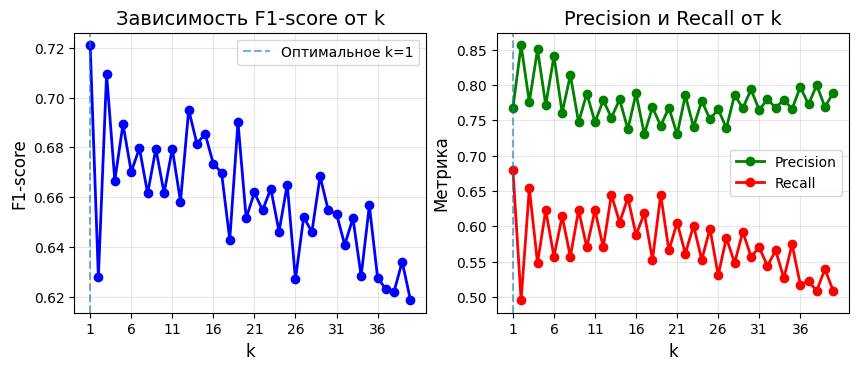

In [52]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, 41), f1_scores_knn, 'b-o', linewidth=2, markersize=6)
plt.axvline(x=best_k, linestyle='--', alpha=0.6, label=f'Оптимальное k={best_k}')
plt.xlabel('k', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.title('Зависимость F1-score от k', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(1, 41, 5))

plt.subplot(2, 2, 2)
plt.plot(range(1, 41), precision_scores_knn, 'g-o', label='Precision', linewidth=2, markersize=6)
plt.plot(range(1, 41), recall_scores_knn, 'r-o', label='Recall', linewidth=2, markersize=6)
plt.axvline(x=best_k, linestyle='--', alpha=0.6)
plt.xlabel('k', fontsize=12)
plt.ylabel('Метрика', fontsize=12)
plt.title('Precision и Recall от k', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(1, 41, 5))

([<matplotlib.axis.XTick at 0x7ba9cc32de50>,
 [Text(2, 0, '2'),
  Text(7, 0, '7'),
  Text(12, 0, '12'),
  Text(17, 0, '17'),
  Text(22, 0, '22'),
  Text(27, 0, '27'),
  Text(32, 0, '32'),
  Text(37, 0, '37')])

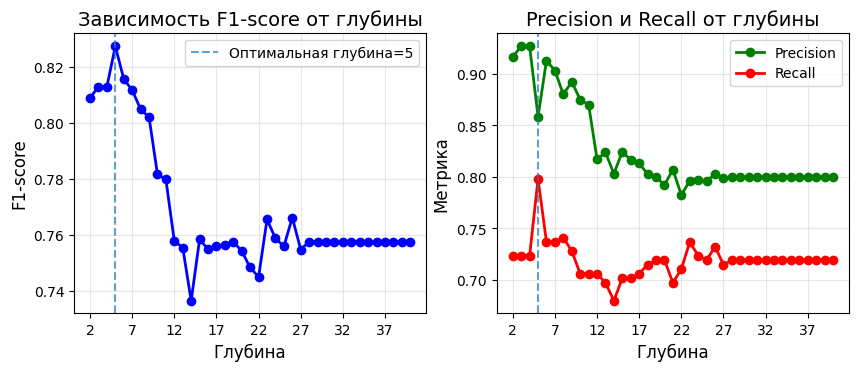

In [53]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(range(2, 41), f1_scores_tree, 'b-o', linewidth=2, markersize=6)
plt.axvline(x=best_depth,  linestyle='--', alpha=0.7, label=f'Оптимальная глубина={best_depth}')
plt.xlabel('Глубина', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.title('Зависимость F1-score от глубины', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(2, 41, 5))

plt.subplot(2, 2, 2)
plt.plot(range(2, 41), precision_scores_tree, 'g-o', label='Precision', linewidth=2, markersize=6)
plt.plot(range(2, 41), recall_scores_tree, 'r-o', label='Recall', linewidth=2, markersize=6)
plt.axvline(x=best_depth,  linestyle='--', alpha=0.7)
plt.xlabel('Глубина', fontsize=12)
plt.ylabel('Метрика', fontsize=12)
plt.title('Precision и Recall от глубины', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(2, 41, 5))

17. (1 балл) Из библиотеки sklearn.linear_model возьмите алгоритм логистической
регрессии (LogisticRegression). Постройте (обучите) модель. Посчитайте
показатели качества. Сравните результат с другими моделями.

In [56]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict(X_test)

print(f"F-мера logistic: {f1_score(y_test, y_pred_logistic):.2f}")
print(f"Precision logistic: {(precision_score(y_test, y_pred_logistic)):.2f}")
print(f"Recall logistic: {(recall_score(y_test, y_pred_logistic)):.2f}")

F-мера logistic: 0.74
Precision logistic: 0.88
Recall logistic: 0.64


Логистическая регрессия демонстрирует более высокую метрику Precision, но ухудшается recall, так что наиболее оптимальным все еще остается дерево решений

18. (1 балл) Из библиотеки sklearn.svm возьмите алгоритм SVM (машины опорных
векторов) (LinearSVC). Постройте (обучите) модель. Посчитайте показатели
качества. Сравните результат с другими моделями.

In [57]:
model_SVM = LinearSVC()
model_SVM.fit(X_train, y_train)
y_pred_SVM = model_SVM.predict(X_test)

print(f"F-мера SVM: {f1_score(y_test, y_pred_SVM):.2f}")
print(f"Precision SVM: {(precision_score(y_test, y_pred_SVM)):.2f}")
print(f"Recall SVM: {(recall_score(y_test, y_pred_SVM)):.2f}")

F-мера SVM: 0.77
Precision SVM: 0.87
Recall SVM: 0.69


SVm демонстрирует наилучший результат среди других моделей